# **Model Training for Stroke Prediction**

### Workflow of Model Training on this notebook 
- Data Preprocessing
- Model Training
- Evaluating Selected Model
- Saving Best Model 

### Importing Necessary Dependencies

In [77]:
class Variable:
    def __init__(self):
        self.random_state = 100
        self.test_size = 0.2
        self.cv = 5
variable = Variable()

In [78]:
import pandas as pd
import numpy as np

In [79]:
df = pd.read_csv('dataset\healthcare-dataset-stroke-data-cleaned.csv', index_col='Unnamed: 0')

### Checking the Dataset

In [80]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.1,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                5110 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 519.0+ KB


In [82]:
# Defining the categorical and numerical feature
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O'] + ['hypertension', 'heart_disease']
numeric_features = [feature for feature in df.drop(['id','stroke'],axis=1).columns if feature not in categorical_features]

# Printing the numerical and categorical feature
print(f'We have {len(numeric_features)} numerical features : {numeric_features}')
print(f'We have {len(categorical_features)} categorical features : {categorical_features}')

We have 3 numerical features : ['age', 'avg_glucose_level', 'bmi']
We have 7 categorical features : ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status', 'hypertension', 'heart_disease']


In [83]:
# Change feature into category type
for feature in categorical_features:
    df[feature] = df[feature].astype('category')

# Check if the type already change
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   id                 5110 non-null   int64   
 1   gender             5110 non-null   category
 2   age                5110 non-null   float64 
 3   hypertension       5110 non-null   category
 4   heart_disease      5110 non-null   category
 5   ever_married       5110 non-null   category
 6   work_type          5110 non-null   category
 7   Residence_type     5110 non-null   category
 8   avg_glucose_level  5110 non-null   float64 
 9   bmi                5110 non-null   float64 
 10  smoking_status     5110 non-null   category
 11  stroke             5110 non-null   int64   
dtypes: category(7), float64(3), int64(2)
memory usage: 275.5 KB


## **1. Data Preprocessing**

### 1.1 importing dependencies

In [84]:
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import EditedNearestNeighbours
from imblearn.pipeline import Pipeline as imbpipeline
from joblib import dump, load

### 1.2 Splitting Feature and Label Value

In [85]:
# Splitting feature and label
input_feature_df = df.drop(labels=['stroke','id'], axis=1)
output_feature_df = df['stroke'].values

# Splitting training and testing data
input_train_feature_df, input_test_feature_df, y_train, y_test = train_test_split(input_feature_df, output_feature_df, test_size= variable.test_size, random_state= variable.random_state)

# Checking shape of training and testing data
print(f"We have {input_train_feature_df.shape} shape on input feature training data")
print(f"We have {y_train.shape} shape on label training data")
print(f"\nWe have {input_test_feature_df.shape} shape on input feature testing data")
print(f"We have {y_test.shape} shape on label testing data")

We have (4088, 10) shape on input feature training data
We have (4088,) shape on label training data

We have (1022, 10) shape on input feature testing data
We have (1022,) shape on label testing data


In [86]:
categorical_features

['gender',
 'ever_married',
 'work_type',
 'Residence_type',
 'smoking_status',
 'hypertension',
 'heart_disease']

In [87]:
input_feature_df['heart_disease'].nunique()

2

In [88]:
input_feature_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5110 entries, 0 to 5109
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   gender             5110 non-null   category
 1   age                5110 non-null   float64 
 2   hypertension       5110 non-null   category
 3   heart_disease      5110 non-null   category
 4   ever_married       5110 non-null   category
 5   work_type          5110 non-null   category
 6   Residence_type     5110 non-null   category
 7   avg_glucose_level  5110 non-null   float64 
 8   bmi                5110 non-null   float64 
 9   smoking_status     5110 non-null   category
dtypes: category(7), float64(3)
memory usage: 195.6 KB


### 1.4 Transform the input feature (independent variable) data

In [89]:
# Make pipeline to differentiate category data with num data 
numerical_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder()) 
])

In [90]:
# Combine transformers using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ],
    remainder='passthrough',
    )

# Just for saw the result, we can fit transform the preprocessor
X_train = preprocessor.fit_transform(input_train_feature_df)
X_test = preprocessor.transform(input_test_feature_df)
print(f"Number of features before transforming: {input_train_feature_df.shape[1]}\nNumber of features after transforming: {X_train.shape[1]}")

Number of features before transforming: 10
Number of features after transforming: 23


### 1.3 Hybrid resampling data

In [91]:
# Use pipeline for resampling data
resample_pipeline = imbpipeline(
    [
        ('SMOTE', SMOTE(sampling_strategy='auto', random_state=variable.random_state)),
        ('EditedNearestNeighbours', EditedNearestNeighbours(sampling_strategy='majority'))
        # ('ADASYN', ADASYN(sampling_strategy='auto', random_state=variable.random_state)), 
    ]
)

# Resampling data
X_train_resample, y_train_resample = resample_pipeline.fit_resample(X_train, y_train)

In [92]:
# Printing before and after resample
print(f"Before using smote:\n{Counter(y_train.tolist())}")
print(f"\nAfter using smote:\n{Counter(y_train_resample.tolist())}")

Before using smote:
Counter({0: 3885, 1: 203})

After using smote:
Counter({1: 3885, 0: 3156})


### 1.5 Saving transformers

In [93]:
# Save the preprocessor to a file using joblib
dump(preprocessor, 'model\\preprocessor.pkl')

['model\\preprocessor.pkl']

## **2. Model Training**

### 2.1 Import Necessary Dependencies

In [94]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

### 2.2 Defining List of Each Algorithm and Parametes

In [95]:
# Define a dictionary of each algorithm and parameter tuning with a fixed random state (e.g., 100)
classifiers = [
    {
        'name': 'RandomForest',
        'classifier': RandomForestClassifier(random_state=variable.random_state),
        'params_grids': {
            'n_estimators': [50, 100, 200],
            'max_depth': [None, 10, 20]
        }
    },
    {
        'name': 'GradientBoosting',
        'classifier': GradientBoostingClassifier(random_state=variable.random_state),
        'params_grids':{
            'n_estimators': [50, 100, 200],
            'learning_rate': [0.01, 0.1]
        }
    },
    {
        'name': 'SVM',
        'classifier': SVC(random_state=variable.random_state),
        'params_grids': {
            'C': [0.1, 1, 10],
            'kernel': ['linear', 'rbf']
        }
    },
    {
        'name': 'LogisticRegression',
        'classifier': LogisticRegression(random_state=variable.random_state),
        'params_grids': {
            'C': [0.1, 1, 10],
            # 'penalty': ['l1', 'l2']
        }
    },
    {
        'name': 'KNeighbors',
        'classifier': KNeighborsClassifier(),
        'params_grids': {
            'n_neighbors': [3, 5, 7],
            'weights': ['uniform', 'distance']
        }
    },
    {
        'name': 'NaiveBayes',
        'classifier': GaussianNB(),
        'params_grids': {}
    },
    {
        'name': 'DecisionTree',
        'classifier': DecisionTreeClassifier(random_state=variable.random_state),
        'params_grids': {
            'max_depth': [None, 10, 20],
            'criterion': ['gini', 'entropy']
        }
    },
    {
        'name': 'MLP',
        'classifier': MLPClassifier(random_state=variable.random_state),
        'params_grids': {
            'hidden_layer_sizes': [(100,), (50, 50), (100, 50, 25)],
            'activation': ['logistic', 'tanh', 'relu']
        }
    },
    {
        'name': 'LinearDiscriminantAnalysis',
        'classifier': LinearDiscriminantAnalysis(),
        'params_grids': {}
    },
    {
        'name': 'AdaBoost',
        'classifier': AdaBoostClassifier(random_state=variable.random_state),
        'params_grids': {
            'n_estimators': [50, 100, 200],
            'learning_rate': [0.01, 0.1, 0.2]
        }
    },
    {
        'name': 'SGD',
        'classifier': SGDClassifier(random_state=variable.random_state),
        'params_grids': {
            # 'loss': ['hinge', 'log', 'perceptron'],
            # 'penalty': ['l1', 'l2', 'elasticnet']
        }
    }
]


### 2.3 Use GridSearchCV for selecting best algorithm and parameters

In [96]:
# Defining function to perform gridsearchcv
def gridsearchcv(estimator:list= classifiers,
                 X= X_train_resample,
                 y= y_train_resample,
                 cv:int= variable.cv,
                 tune_params:bool = True):
    results = []
    # If else for tune params on each algorithm
    for clf in estimator:
        if tune_params:
                grid_search = GridSearchCV(clf['classifier'], param_grid=clf['params_grids'], cv=cv, scoring='roc_auc')     
        else:
                grid_search = GridSearchCV(clf['classifier'], param_grid=[{}], cv=cv, scoring='f1')
                
        grid_search.fit(X, y)
        # Store the results
        results.append({
            'name': clf['name'],
            'best_estimator': grid_search.best_estimator_,
            'best_params': grid_search.best_params_,
            'best_score': grid_search.best_score_
        })

    return results

In [97]:
# Perform GridSearchCV for each classifier
results = gridsearchcv()

d:\Python Project\Personal Project - End to End ML Stroke Prediction\venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
d:\Python Project\Personal Project - End to End ML Stroke Prediction\venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
d:\Python Project\Personal Project - End to End ML Stroke Prediction\venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
d:\Python Project\Personal Project - End to End ML Stroke Prediction\venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: Convergence

In [98]:
# Display the results for each classifier
for result in results:
    print(f"Classifier: {result['name']}")
    print(f"Best Parameters: {result['best_params']}")
    print(f"Best Score: {result['best_score']}")
    print('----------------------------------')

Classifier: RandomForest
Best Parameters: {'max_depth': None, 'n_estimators': 200}
Best Score: 0.9987535326441324
----------------------------------
Classifier: GradientBoosting
Best Parameters: {'learning_rate': 0.1, 'n_estimators': 200}
Best Score: 0.9890944500525436
----------------------------------
Classifier: SVM
Best Parameters: {'C': 10, 'kernel': 'rbf'}
Best Score: 0.9921864655455097
----------------------------------
Classifier: LogisticRegression
Best Parameters: {'C': 0.1}
Best Score: 0.9130837923321223
----------------------------------
Classifier: KNeighbors
Best Parameters: {'n_neighbors': 7, 'weights': 'distance'}
Best Score: 0.9966481993122448
----------------------------------
Classifier: NaiveBayes
Best Parameters: {}
Best Score: 0.8585560461448143
----------------------------------
Classifier: DecisionTree
Best Parameters: {'criterion': 'entropy', 'max_depth': 10}
Best Score: 0.9493429704038242
----------------------------------
Classifier: MLP
Best Parameters: {'ac

In [99]:
# Print the best algorithm and parameters
best_model_dict = max(results, key=lambda x: x['best_score'])
best_model_dict

{'name': 'RandomForest',
 'best_estimator': RandomForestClassifier(n_estimators=200, random_state=100),
 'best_params': {'max_depth': None, 'n_estimators': 200},
 'best_score': 0.9987535326441324}

### 2.4 Saving The Model

In [100]:
# Get the best model found during the grid search
best_model = best_model_dict['best_estimator']

# Save the best model to a file
dump(best_model, 'model\\best_model.pkl')

['model\\best_model.pkl']

## **3. Evaluating Selected Model**

### 3.1 Import Necessary Dependencies

In [101]:
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [102]:
# Importing model
model = load('model\\best_model.pkl')
# Test the model on training set
print(classification_report(y_pred = model.predict(X_train), y_true= y_train))

              precision    recall  f1-score   support

           0       1.00      0.91      0.95      3885
           1       0.36      1.00      0.53       203

    accuracy                           0.91      4088
   macro avg       0.68      0.95      0.74      4088
weighted avg       0.97      0.91      0.93      4088



### 3.2 Predict Test Data

In [103]:
predictions = model.predict(X_test)

# print result of prediction
print(f"True label: {y_test[:10]}")
print(f"Result of prediction: {predictions[:10]}")

True label: [0 0 0 0 0 0 1 0 0 0]
Result of prediction: [0 0 0 0 0 0 1 0 0 0]


### 3.3 Evaluate the result

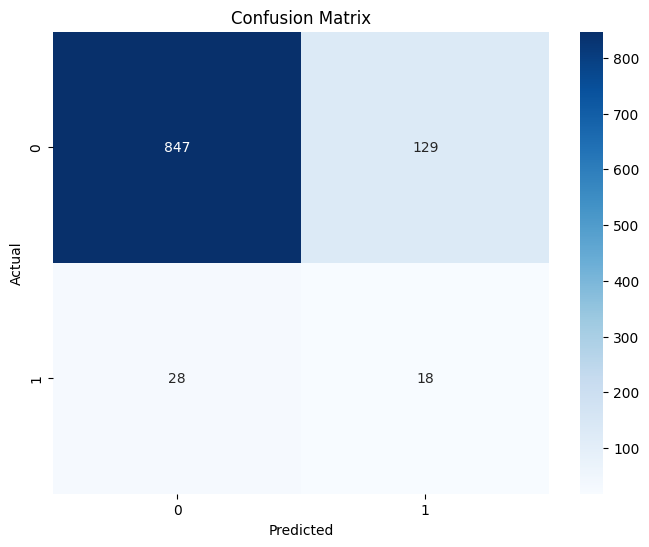

In [104]:
# Generate confusion matrix
conf_matrix = confusion_matrix(y_true= y_test, y_pred= predictions)

# Display confusion matrix using heatmap
plt.figure(figsize= (8,6))
sns.heatmap(conf_matrix, annot= True, fmt= 'd', cmap ='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [105]:
# Generate and print the classification report
report = classification_report(y_true= y_test, y_pred= predictions)
print(f"Classification Report:\n{report}")

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.87      0.92       976
           1       0.12      0.39      0.19        46

    accuracy                           0.85      1022
   macro avg       0.55      0.63      0.55      1022
weighted avg       0.93      0.85      0.88      1022



ROC AUC Score: 0.7938680506058446


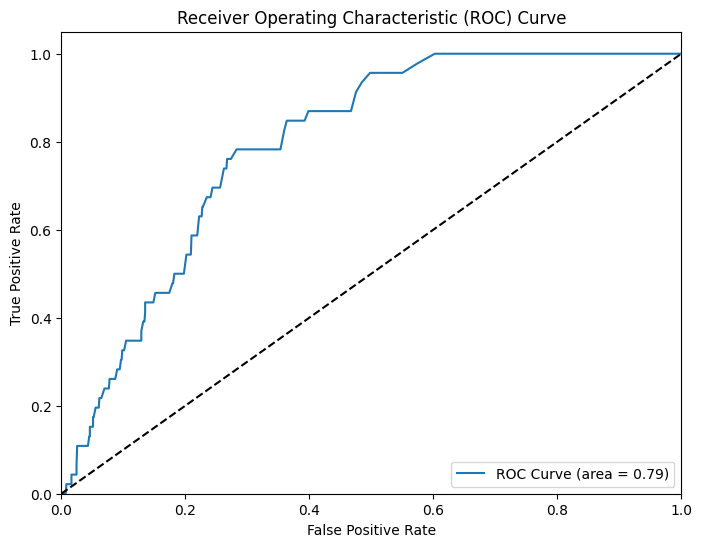

In [106]:
# Calculate and print the ROC AUC score
roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
print("ROC AUC Score:", roc_auc)

# Generate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:, 1])

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC Curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

### 3.4 Using Specific Treshold

In [107]:
# Calculate the Youden's J statistic
Youden = tpr - fpr

# Find the threshold that maximizes Youden's J statistic
optimal_threshold = thresholds[np.argmax(Youden)]

print("Optimal Threshold:", optimal_threshold)

Optimal Threshold: 0.19


In [108]:
# Make predictions using the optimal threshold
thres_predictions = (model.predict_proba(X_test)[:, 1] >= optimal_threshold).astype(int)

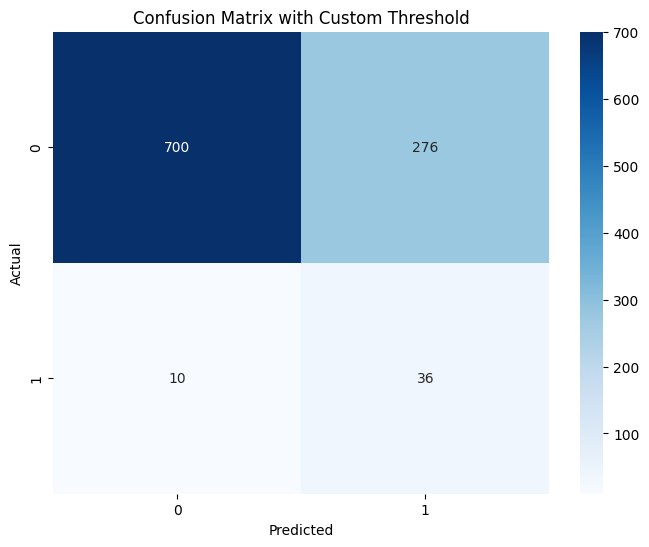

In [109]:
# Display confusion matrix using heatmap
plt.figure(figsize= (8,6))
sns.heatmap(confusion_matrix(y_true= y_test, y_pred= thres_predictions), annot= True, fmt= 'd', cmap ='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix with Custom Threshold")
plt.show()


In [110]:
print(f"Classification Report:\n{classification_report(y_true=y_test,y_pred=thres_predictions)}")

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.72      0.83       976
           1       0.12      0.78      0.20        46

    accuracy                           0.72      1022
   macro avg       0.55      0.75      0.52      1022
weighted avg       0.95      0.72      0.80      1022



## **4. Saving Best Model**

### 4.1 Saving the optimal threshold 

In [111]:
# Specify and save the threshold to a separate file
with open("model\\threshold.txt", "w") as threshold_file:
    threshold_file.write(str(optimal_threshold))

### 4.2 Load model with threshold

In [112]:
from notebook_utils import ClassifierModelThreshold
# Load the model
threshold_model = ClassifierModelThreshold("model\\best_model.pkl",
                                           "model\\threshold.txt")

# Use loaded model to predict
thres_predictions_load = threshold_model.predict_with_threshold(X_test)

# Use assert to check if the two values are equal
thres_predictions_load

array([1, 1, 0, ..., 0, 0, 0])